In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [9]:
X,y=make_blobs(n_samples=1000, centers=3, n_features=2)

In [10]:
X

array([[-6.10222319, -5.2067188 ],
       [-5.22360548, -4.94209175],
       [ 6.29816484, -8.27761017],
       ...,
       [-6.53216265, -4.30666622],
       [-4.76098892, -4.65760121],
       [-3.45114876, -6.56619868]], shape=(1000, 2))

In [11]:
y

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 0,
       2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0,
       1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 0, 1,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1, 0,
       2, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0,
       2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 2,
       1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1,
       2, 1, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2,
       1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2,
       1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 1,
       1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0,
       1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2,
       0, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 2,

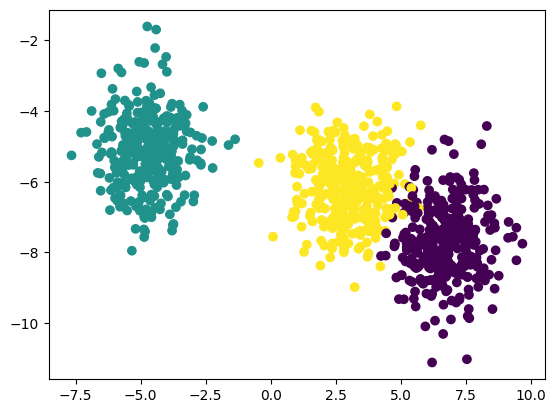

In [12]:
plt.scatter(X[:,0],X[:,1],c=y)

In [13]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
from sklearn.cluster import KMeans

In [18]:
# Elbow Method to find optimal number of clusters
wcss = []
for k  in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [19]:
wcss

[1599.9999999999995,
 614.4865758741387,
 342.90671150780105,
 266.3316416777319,
 200.57323223581713,
 163.6405960533853,
 138.46464310838255,
 119.93493735070237,
 105.25088170563158,
 88.73908322778252]

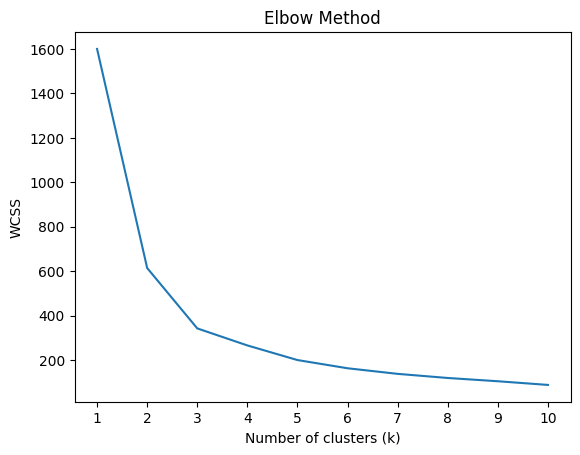

In [20]:
## plot elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [21]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [22]:
kmeans.fit_predict(X_train_scaled)

array([2, 2, 0, 1, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2,
       1, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1,
       1, 0, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0,
       1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1,
       1, 2, 2, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2,
       1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1,
       0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 1, 2,
       2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1,
       1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 0, 1,
       2, 2, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1,

In [23]:
y_pred=kmeans.predict(X_test_scaled)

In [24]:
y_pred

array([0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0,
       0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1,
       2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1,
       0, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 2, 0, 2,
       0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0,
       0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 0, 1,
       0, 2], dtype=int32)

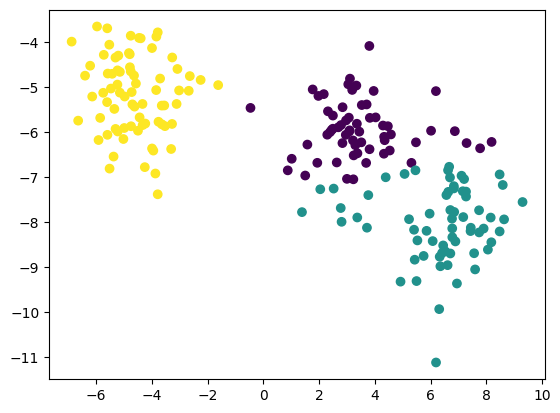

In [25]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [26]:
## kneelocator
!pip install kneed

In [27]:
from kneed import KneeLocator

In [28]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [29]:
kl.elbow

np.int64(3)

In [30]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [31]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [32]:
silhouette_coefficients

[np.float64(0.532610227256738),
 np.float64(0.5058744992028795),
 np.float64(0.4635746761789237),
 np.float64(0.4276152169892894),
 np.float64(0.42191257342012295),
 np.float64(0.4143610535341425),
 np.float64(0.4050355010799897),
 np.float64(0.4147390710820735),
 np.float64(0.4100309449746108)]

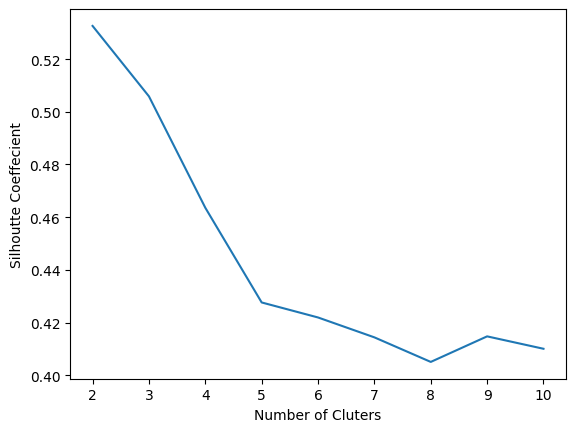

In [33]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()